In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import seaborn as sns
sns.set_theme()

df = pd.read_csv('./data/meow_midsem.csv')

df.rename(columns={'Mid':'Marks'}, inplace=True)
# df.rename(columns={'ID':'ID No'}, inplace=True)
df['ID'] = df['ID'].str[:-1]
# df.dropna(subset=['Marks'], inplace=True)
# df['code'] = df['ID No'].str[4:6]

# df['rank'] = df['ID No'].str[-5:-1].astype(int)
# add a column with empty values
df['code'] = ''

%load_ext autoreload
%autoreload 2

df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,ID,T1,T2,Marks,Tot (130),code
0,0148,7.0,8.0,8,23.0,
1,0160,6.0,13.0,57,76.0,
2,0449,3.5,9.0,15,27.5,
3,0232,0.0,0.0,67,67.0,
4,0363,15.0,2.0,42,59.0,
...,...,...,...,...,...,...
577,0503,12.0,15.0,50,77.0,
578,1595,0.0,0.0,1,1.0,
579,0146,14.0,0.0,37,51.0,
580,1265,0.5,0.0,40,40.5,


In [19]:
cp_df = pd.read_csv('./data/CP/cp_compre.csv')
cp_df['code'] = cp_df['ID'].str[4:6]
cp_df['ID No'] = cp_df['ID'].str[8:-1]
cp_df

,ID,Name,Part_A(36M),Part_B(36M),Total(72M),code,ID No
0,2022A1PS0530P,IRA DOGRA,10.000000,10.000000,20.000000,A1,0530
1,2022A1PS0589P,ASLESH JAMBHALE,29.000000,27.000000,56.000000,A1,0589
2,2022A1PS0593P,AAYUSH AASHISH MAHESHWARI,15.000000,18.000000,33.000000,A1,0593
3,2022A1PS0643P,SHIVANG GUPTA,28.000000,24.000000,52.000000,A1,0643
4,2022A1PS0661P,ARYAMAN DUBEY,8.000000,12.000000,20.000000,A1,0661
...,...,...,...,...,...,...,...
593,2022AAPS0366P,DIWAKAR MITTAL,18.000000,20.000000,38.000000,AA,0366
594,2022AAPS0369P,SUBRAT ROY,19.000000,23.000000,42.000000,AA,0369
595,2022AAPS1191P,SHAILENDRA KUMAR GUPTA,NaN,NaN,NaN,AA,1191
596,2022AAPS1192P,KUSHAAGRA SINGH,20.000000,15.000000,35.000000,AA,1192


In [20]:
for i in range(len(df)):
    if df.loc[i, 'ID'] in cp_df['ID No'].values:
        df.loc[i, 'code'] = cp_df[cp_df['ID No'] == df.loc[i, 'ID']]['code'].values[0]

df

,ID,T1,T2,Marks,Tot (130),code
0,0148,7.0,8.0,8,23.0,A7
1,0160,6.0,13.0,57,76.0,A7
2,0449,3.5,9.0,15,27.5,A4
3,0232,0.0,0.0,67,67.0,AA
4,0363,15.0,2.0,42,59.0,AA
...,...,...,...,...,...,...
577,0503,12.0,15.0,50,77.0,A3
578,1595,0.0,0.0,1,1.0,A1
579,0146,14.0,0.0,37,51.0,A7
580,1265,0.5,0.0,40,40.5,A8


In [13]:
df[df['code'] == '']

,ID,T1,T2,Marks,Tot (130),code


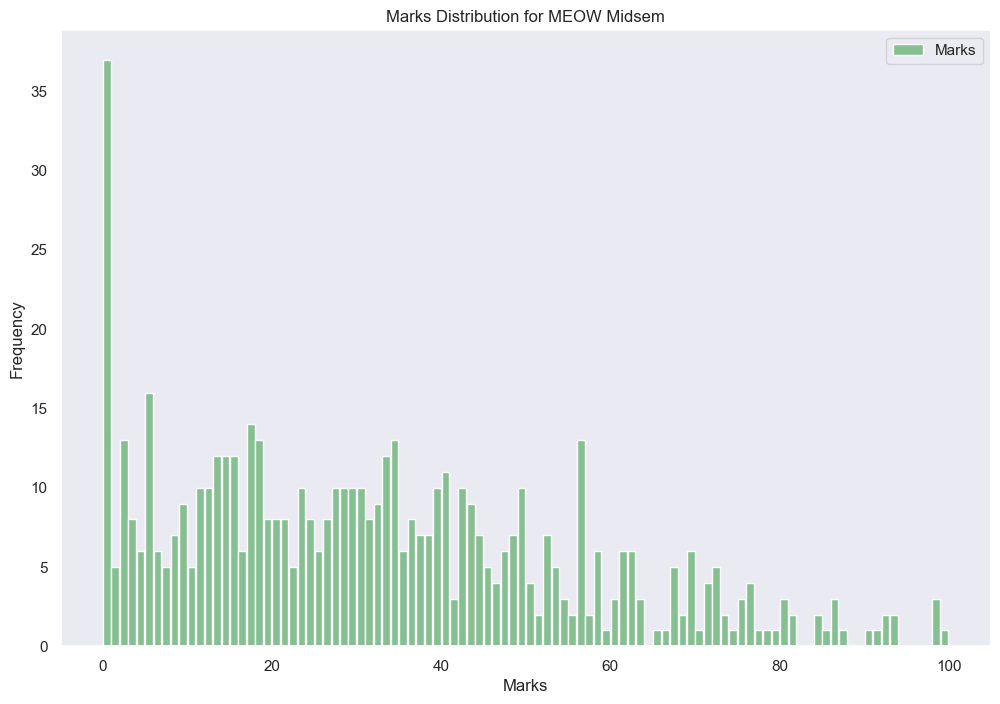

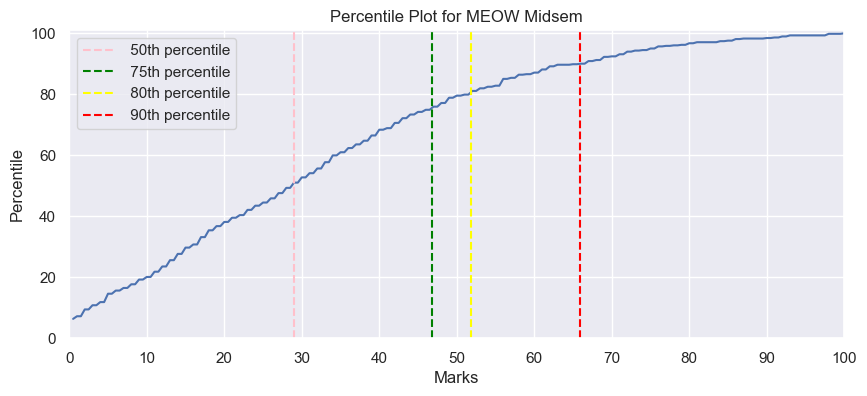

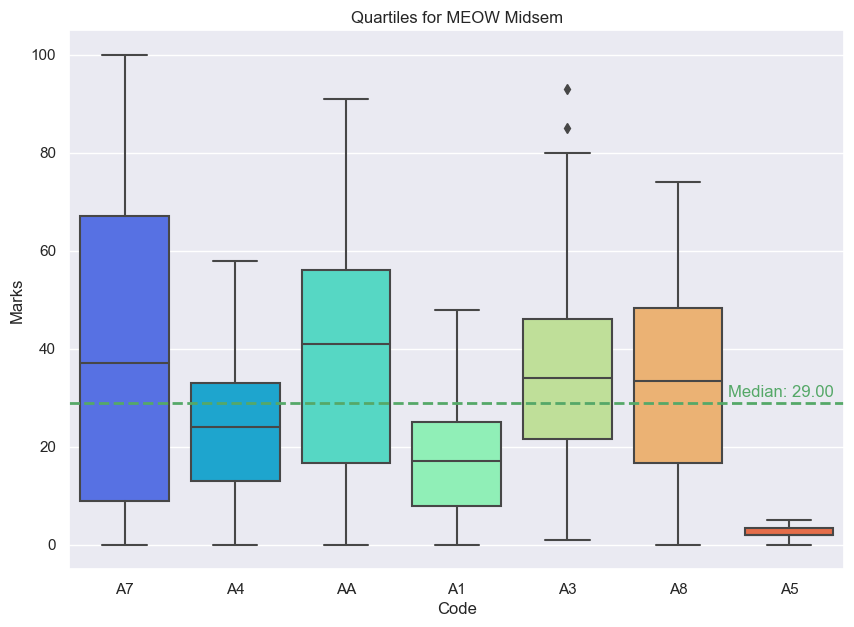

In [37]:
from graph_gen import graph

g = graph('MEOW Midsem', df, 100, codes=True)
g.gen_all()